# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### <font color="red">Exercise 02.1: computation of integrals via Monte Carlo<font>

We have to compute the following 1D integral via Monte Carlo.
$$I = \int_0^1 \frac{\pi}{2} \cos\left(\frac{\pi}{2} x \right) dx = 1$$

First we calculate it sampling a uniform distribution in $[0,1]$, then using importance sampling, drawing the points from a linear probability distribution $p(x)=2-2x$ with $x \in[0,1]$. 

We ask our generator for $10^6$ random numbers and divide them in $100$ blocks to calculate uncertainty through the all process of extraction, not just after all the numbers have been drawn. We represent then the extimated integral minus its analytic value, $1$.

The results are compatible with the expected value of the integral; it's worth noting that, with the same number of throwings, $10^6$, the error of the importance sampling method is approximately *5 times smaller* than the uniform sampling.

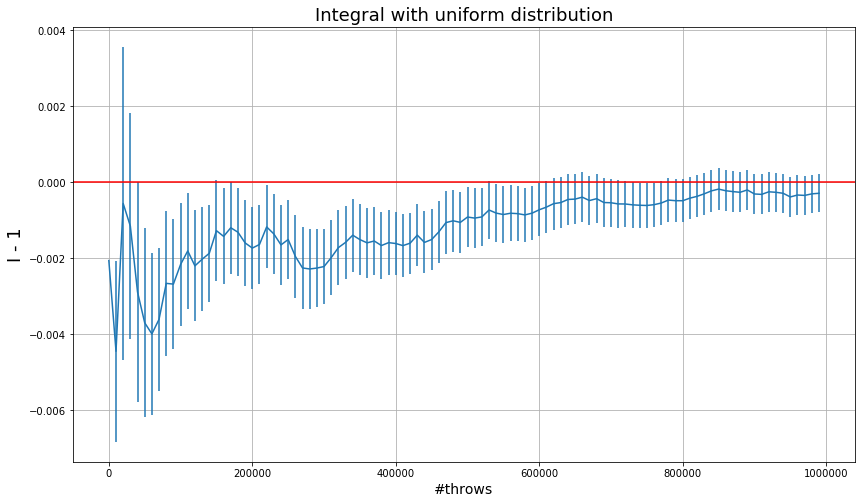

Monte Carlo, uniform distribution, 1000000 points: 

I = 0.99971 ± 0.000501266


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N


x = np.arange(N)      # [0,1,2,...,N-1]

sum_prog, err_prog = np.loadtxt("./2.1/risultati.dat", usecols=(0,1), delimiter=' ', unpack='true')    
    
x*=L # Number of throws = block * (Number of throws in each block)
fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,sum_prog-1.,yerr=err_prog)
plt.title('Integral with uniform distribution', fontsize=18)
plt.xlabel('#throws', fontsize=14)
plt.ylabel('I - 1', fontsize=18)
plt.axhline(y=0., color='r', linestyle='-')
plt.grid(True)
plt.show()

print("Monte Carlo, uniform distribution, " + str(M) +" points: \n\nI = "+str(sum_prog[-1])+" ± "+str(err_prog[-1]))

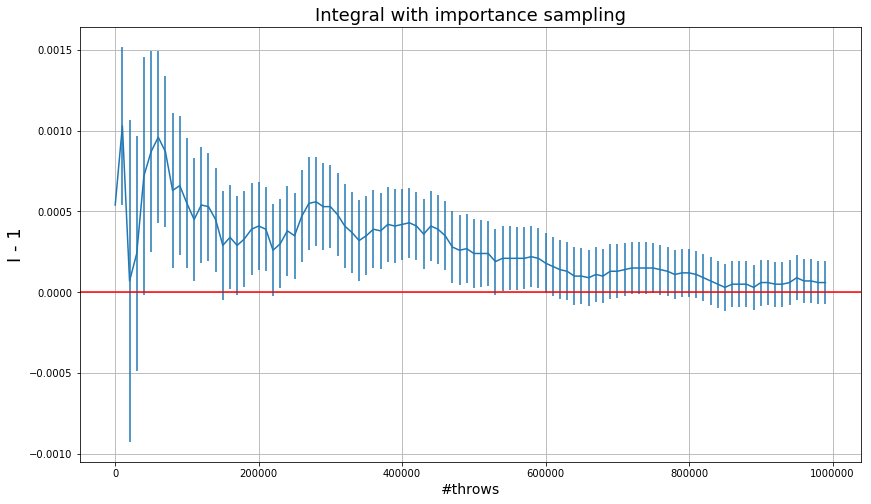

Monte Carlo, importance sampling, 1000000 points: 

I = 1.00006 ± 0.000134265


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N


x = np.arange(N)      # [0,1,2,...,N-1]

sum_prog, err_prog = np.loadtxt("./2.1/risultati_importance.dat", usecols=(0,1), delimiter=' ', unpack='true')    
    
x*=L # Number of throws = block * (Number of throws in each block)
fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,sum_prog-1.,yerr=err_prog)
plt.title('Integral with importance sampling', fontsize=18)
plt.xlabel('#throws', fontsize=14)
plt.ylabel('I - 1', fontsize=18)
plt.axhline(y=0., color='r', linestyle='-')
plt.grid(True)
plt.show()

print("Monte Carlo, importance sampling, " + str(M) +" points: \n\nI = "+str(sum_prog[-1])+" ± "+str(err_prog[-1]))

### <font color="red">Exercise 02.2: 3D Random Walks<font>

We are going to simulate a 3D Random Walk first on a cubic lattice and then in the continuum.
In order to calulate the variance of the processes, namely $\sqrt{\langle |\vec{r}_N|^2 \rangle}$, we'll perform $10^6$ simulations in each case and use the block method to calculate uncertainties.

We are simulating two cases:
1. <strong> discrete</strong>: on a cubic lattice with spacing $a=1$ between points of the lattice; at each discrete time the walker makes a forward or backward step of length $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$;
2. <strong> continuum</strong>: at each discrete time the walker makes a step of length equal to $a(=1)$ along a random direction obtained by sampling uniformly the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$.

We then represent a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both the cases, with their statistical uncertainties, as function of the step $N \in [0,100]$. For example, when we write $\sqrt{\langle |\vec{r}_{10}|^2 \rangle_{RW}}$, we are referring to the mean length at the 10th step of our $10^6$ simulated random walks.

In the end we try and fit the functions with $f(N)=a \cdot N^b$; since the uncertainties associated to the results were in both cases very tiny, we chose a function with a free exponent parameter $b$ rather than fixing a square-root graph $f(N)=a \sqrt{N}$ and seeing if it crossed all the uncertainty bars. 

In both cases $0.5$ is inside the interval $b \pm \sigma_b$, pointing  out that the behaviour is diffusive. 

optimized parameters [a], [b] =
[0.0100027  0.50002482]
parameters uncertainty =
[3.46674260e-06 2.60001447e-05]


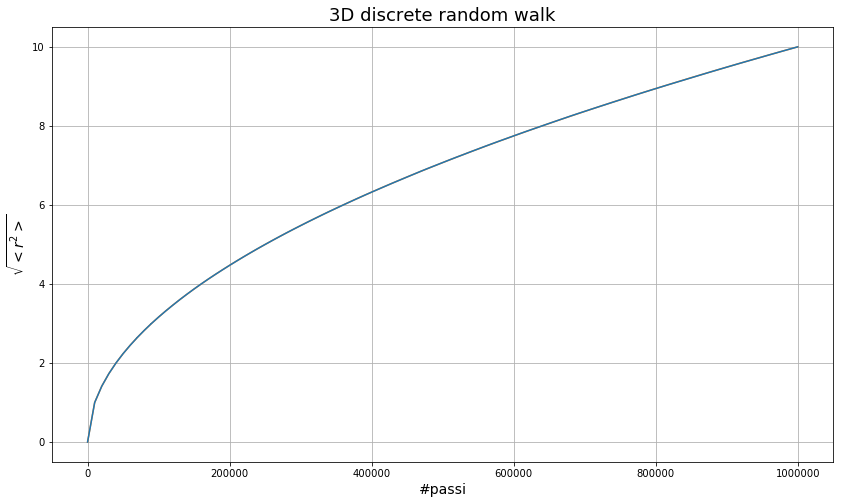

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,a,b):  # defining the fitting function
    return a * x**b

N=1000000             # Total number of throws
k=100                 # Number of steps


x = np.arange(k+1)      # [0,1,2,...,k]

sum_prog, err_prog = np.loadtxt("./2.2/Prima_parte/risultati.dat", usecols=(0,1), delimiter=' ', unpack='true')    
    
x*=L # Number of throws = block * (Number of throws in each block)

p_opt, p_cov = curve_fit(f, x, sum_prog)
y_fit = f(x,p_opt[0],p_opt[1])

print("optimized parameters [a], [b] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.plot(x,y_fit)
plt.title('3D discrete random walk', fontsize=18)
plt.xlabel('#passi', fontsize=14)
plt.ylabel('$\sqrt{<r^2>}$', fontsize=14)
plt.grid(True)
plt.show()

optimized parameters [a], [b] =
[0.99921324 0.50023175]
parameters uncertainty =
[1.75477424e-04 4.24133411e-05]


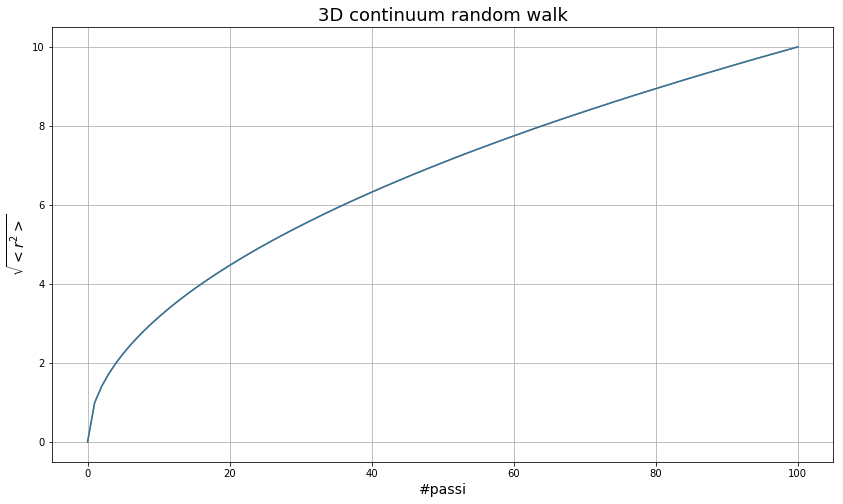

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,a,b):  # defining the fitting function
    return a * x**b

N=1000000             # Total number of throws
k=100                 # Number of steps

x = np.arange(k+1)      # [0,1,2,...,k]

sum_prog, err_prog = np.loadtxt("./2.2/Seconda_parte/risultati.dat", usecols=(0,1), delimiter=' ', unpack='true')    

p_opt, p_cov = curve_fit(f, x, sum_prog)
y_fit = f(x,p_opt[0],p_opt[1])

print("optimized parameters [a], [b] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.plot(x,y_fit)
plt.title('3D continuum random walk', fontsize=18)
plt.xlabel('#passi', fontsize=14)
plt.ylabel('$\sqrt{<r^2>}$', fontsize=14)
plt.grid(True)
plt.show()